In [1]:
import pandas as pd
sf = pd.read_csv('Yacht_Hydrodynamics.csv')
sf.head()

,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement,Beam_Draught,Length_Beam,Froude_Number,Residuary_Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [2]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
Longitudinal_Position    308 non-null float64
Prismatic_Coefficient    308 non-null float64
Length_Displacement      308 non-null float64
Beam_Draught             308 non-null float64
Length_Beam              308 non-null float64
Froude_Number            308 non-null float64
Residuary_Resistance     308 non-null float64
dtypes: float64(7)
memory usage: 17.0 KB


In [3]:
sf.describe()

,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement,Beam_Draught,Length_Beam,Froude_Number,Residuary_Resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


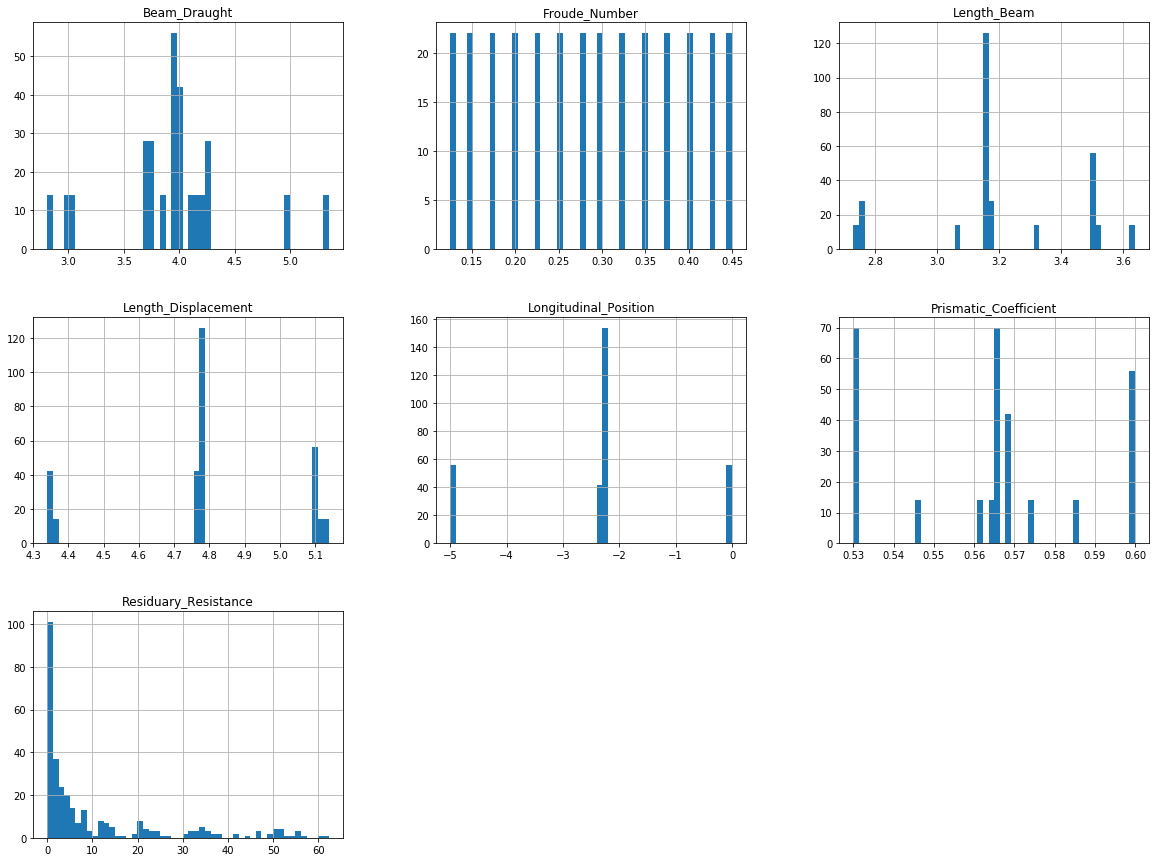

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

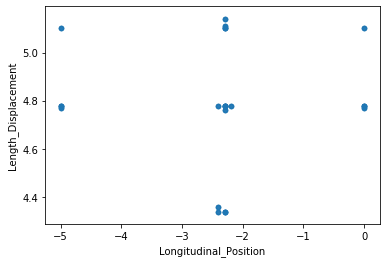

In [5]:
sf.plot(kind="scatter", x="Longitudinal_Position", y="Length_Displacement", alpha=0.2)
plt.savefig('map1.png')

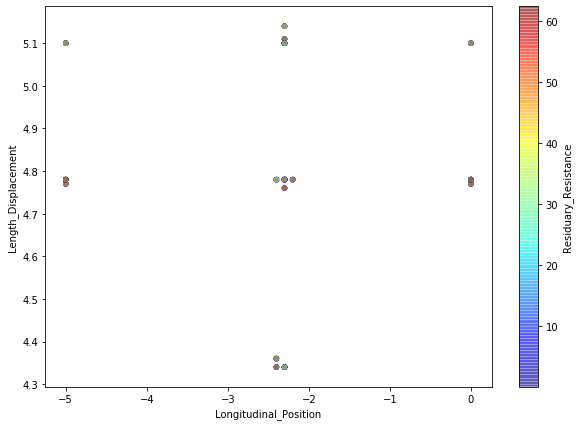

In [6]:
sf.plot(kind="scatter", x="Longitudinal_Position", y="Length_Displacement", alpha=0.4, figsize=(10,7),
    c="Residuary_Resistance", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the last sold price.

In [7]:
corr_matrix = sf.corr()
corr_matrix["Residuary_Resistance"].sort_values(ascending=False)

Residuary_Resistance     1.000000
Froude_Number            0.810092
Longitudinal_Position    0.019306
Length_Beam             -0.001025
Length_Displacement     -0.002967
Beam_Draught            -0.012421
Prismatic_Coefficient   -0.028569
Name: Residuary_Resistance, dtype: float64

The residuary resistance per unit weight of displacement tends to go up when the froude number goes up. You can see a small negative correlation between the prismatic coefficient and the residuary resistance. Finally, coefficients close to zero mean that there is no linear correlation.

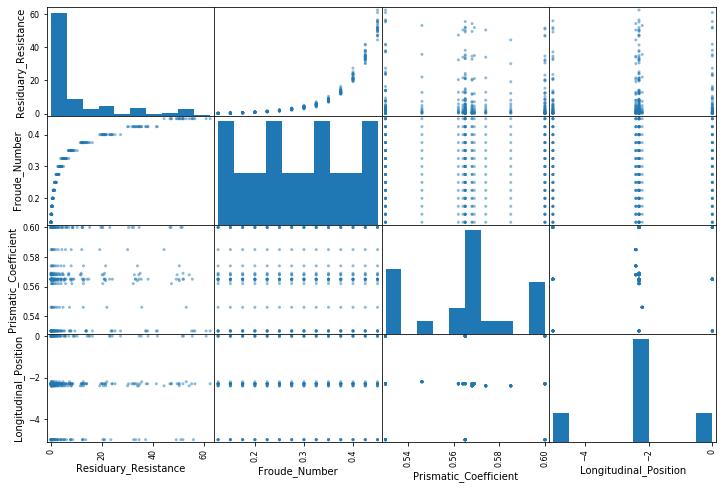

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Residuary_Resistance", "Froude_Number", "Prismatic_Coefficient", "Longitudinal_Position"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the residuary resistance is the froude number, so let’s zoom in on their correlation scatterplot

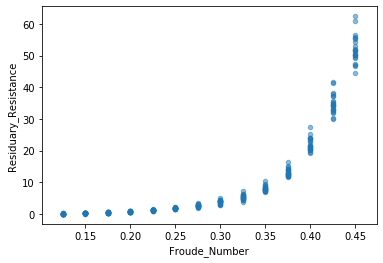

In [9]:
sf.plot(kind="scatter", x="Froude_Number", y="Residuary_Resistance", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

In [10]:
sf.columns

Index(['Longitudinal_Position', 'Prismatic_Coefficient', 'Length_Displacement',
       'Beam_Draught', 'Length_Beam', 'Froude_Number', 'Residuary_Resistance'],
      dtype='object')

In [11]:
sf = sf[['Longitudinal_Position', 'Prismatic_Coefficient', 'Length_Displacement',
       'Beam_Draught', 'Length_Beam', 'Froude_Number', 'Residuary_Resistance']]
sf.head()

,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement,Beam_Draught,Length_Beam,Froude_Number,Residuary_Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [12]:
X = sf[['Longitudinal_Position', 'Prismatic_Coefficient', 'Length_Displacement',
       'Beam_Draught', 'Length_Beam', 'Froude_Number']]
Y = sf['Residuary_Resistance']

In [13]:
X.head()

,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement,Beam_Draught,Length_Beam,Froude_Number
0,-2.3,0.568,4.78,3.99,3.17,0.125
1,-2.3,0.568,4.78,3.99,3.17,0.150
2,-2.3,0.568,4.78,3.99,3.17,0.175
3,-2.3,0.568,4.78,3.99,3.17,0.200
4,-2.3,0.568,4.78,3.99,3.17,0.225


In [14]:
X.shape

(308, 6)

In [15]:
Y.shape

(308,)

Standardization of the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

In [19]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.5487


So, in our model, 54.87% of the variability in Y can be explained using X. It is not so exciting.

Calculate root-mean-square error (RMSE)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 8.8019


Our model was able to predict the value of every residuary resistance per unit weight in the test set within 8.8019 of the real residuary resistance per unit weight.

Calculate mean absolute error (MAE)

In [21]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 7.5712


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9977


In [24]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 0.6217


Much better! Let's try one more.

In [25]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9986


In [27]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 0.4979


I would consider this is our final model, let's print out feature importance

In [28]:
feature_labels = np.array(['Longitudinal_Position', 'Prismatic_Coefficient', 'Length_Displacement', 'Beam_Draught',
                           'Length_Beam', 'Froude_Number'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Froude_Number-98.84%
Prismatic_Coefficient-0.55%
Beam_Draught-0.35%
Longitudinal_Position-0.19%
Length_Beam-0.05%
Length_Displacement-0.01%
